<a href="https://colab.research.google.com/github/JulienGremillot/OpenClassrooms_Ingenieur_Machine_Learning/blob/main/Classez%20des%20images%20%C3%A0%20l'aide%20d'algorithmes%20de%20Deep%20Learning/Classez_des_images_%C3%A0_l'aide_d'algorithmes_de_Deep_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,\
    Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomTranslation,\
    RandomContrast, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input,\
 decode_predictions
from tensorflow.keras.applications import ResNet50, InceptionV3, Xception,\
 EfficientNetB0
from tensorflow.keras.preprocessing.image import load_img, img_to_array,\
 ImageDataGenerator
from tensorflow.keras import Input, Model
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.data import AUTOTUNE
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

In [3]:
drive.mount("/content/gdrive", force_remount=False)
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
print("Répertoire de travail courant : %s" % os.getcwd())

Mounted at /content/gdrive
Répertoire de travail courant : /content/gdrive/MyDrive/Colab Notebooks


Je charge le modèle VGG16 pour voir sa composition

In [ ]:
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

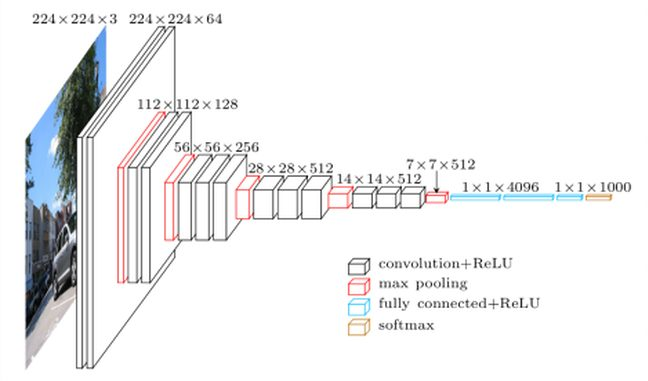

Par rapport à mon modèle entrainé "from scratch", on peut voir que la composition de ce modèle n'est pas à ma portée au vu du nombre de couches et des tailles utilisées.

Je charge un premier jeu de données "allégé" avec uniquement ma sélection de 12 races (10% du jeu de données initial)

In [4]:
width, height = 224, 224
batch_size = 32
nb_classes = 12
dataset_12 = "./images_12/"
train_12 = image_dataset_from_directory(
  dataset_12,
  validation_split=0.2,
  subset="training",
  seed=99,
  image_size=(height, width),
  batch_size=batch_size)
val_12 = image_dataset_from_directory(
  dataset_12,
  validation_split=0.2,
  subset="validation",
  seed=99,
  image_size=(height, width),
  batch_size=batch_size)

Found 2648 files belonging to 12 classes.
Using 2119 files for training.
Found 2648 files belonging to 12 classes.
Using 529 files for validation.


In [5]:
class_names = train_12.class_names
print(class_names)

['n02085936-Maltese_dog', 'n02086240-Shih_Tzu', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02092002-Scottish_deerhound', 'n02097474-Tibetan_terrier', 'n02107683-Bernese_mountain_dog', 'n02110806-basenji', 'n02111129-Leonberg', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian']


Je charge le modèle VGG16 sans la dernière couche, et je lui ajoute mes propres couches de classifiers.

In [ ]:
model = VGG16(include_top=False, input_shape=(height, width, 3))

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(nb_classes, activation='softmax')(class1)

model = Model(inputs=model.inputs, outputs=output)
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Je réentraine le modèle complètement

In [6]:
epochs = 10

In [ ]:
history = model.fit(
  train_12,
  validation_data=val_12,
  epochs=epochs
)

Epoch 1/10
67/67 [==============================] - 164s 2s/step - loss: 12.7882 - accuracy: 0.0816 - val_loss: 2.4852 - val_accuracy: 0.1040
Epoch 2/10
67/67 [==============================] - 16s 235ms/step - loss: 2.4890 - accuracy: 0.0977 - val_loss: 2.4839 - val_accuracy: 0.0851
Epoch 3/10
67/67 [==============================] - 16s 235ms/step - loss: 2.4846 - accuracy: 0.0878 - val_loss: 2.4834 - val_accuracy: 0.1059
Epoch 4/10
67/67 [==============================] - 16s 234ms/step - loss: 2.4843 - accuracy: 0.0859 - val_loss: 2.4831 - val_accuracy: 0.1059
Epoch 5/10
67/67 [==============================] - 16s 235ms/step - loss: 3.7793 - accuracy: 0.0925 - val_loss: 2.4909 - val_accuracy: 0.1115
Epoch 6/10
67/67 [==============================] - 16s 235ms/step - loss: 2.4856 - accuracy: 0.0868 - val_loss: 2.4834 - val_accuracy: 0.1059
Epoch 7/10
67/67 [==============================] - 16s 235ms/step - loss: 2.4843 - accuracy: 0.0925 - val_loss: 2.4833 - val_accuracy: 0.1059


In [7]:
def show_perfs(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

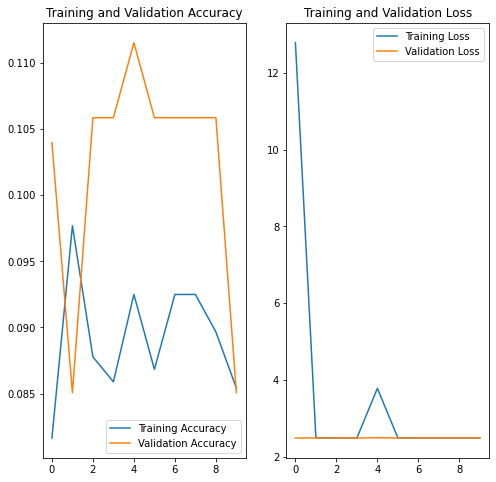

In [ ]:
show_perfs(history, epochs)

J'ai pu lire que l'optimiseur adam n'était pas recommandé pour entraîner VGG, car il échoue en raison du grand nombre de paramètres dans le réseau VGG.

Je refais un test avec l'optimiseur sgd :

In [ ]:
model.compile(optimizer='sgd',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_12,
  validation_data=val_12,
  epochs=epochs
)

Epoch 1/10
67/67 [==============================] - 17s 236ms/step - loss: 2.4837 - accuracy: 0.0873 - val_loss: 2.4835 - val_accuracy: 0.0851
Epoch 2/10
67/67 [==============================] - 16s 234ms/step - loss: 2.4837 - accuracy: 0.0897 - val_loss: 2.4835 - val_accuracy: 0.0851
Epoch 3/10
67/67 [==============================] - 16s 234ms/step - loss: 2.4837 - accuracy: 0.0859 - val_loss: 2.4836 - val_accuracy: 0.0851
Epoch 4/10
67/67 [==============================] - 16s 233ms/step - loss: 2.4836 - accuracy: 0.0878 - val_loss: 2.4836 - val_accuracy: 0.0851
Epoch 5/10
67/67 [==============================] - 16s 233ms/step - loss: 2.4836 - accuracy: 0.0892 - val_loss: 2.4836 - val_accuracy: 0.0851
Epoch 6/10
67/67 [==============================] - 16s 233ms/step - loss: 2.4837 - accuracy: 0.0873 - val_loss: 2.4836 - val_accuracy: 0.0851
Epoch 7/10
67/67 [==============================] - 16s 233ms/step - loss: 2.4836 - accuracy: 0.0807 - val_loss: 2.4836 - val_accuracy: 0.0851

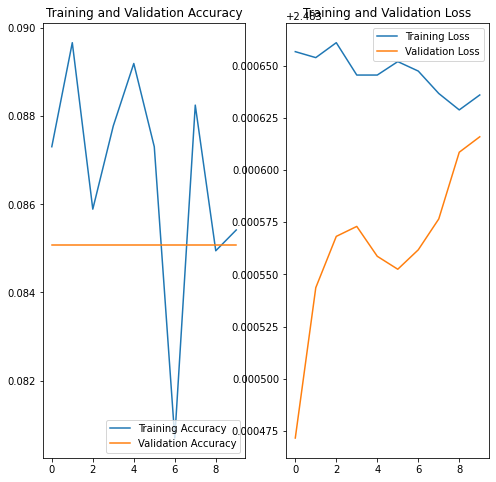

In [ ]:
show_perfs(history, epochs)

Ca ne semble pas vraiment mieux. Je refais un test en récupérant à nouveau le modèle VGG16 et en fixant les poids des premières couches.

In [ ]:
vgg = VGG16(include_top=False, input_shape=(height, width, 3))

# Ici je passe les couches du modèles à trainable = False
for layer in vgg.layers:
        layer.trainable = False

flat1 = Flatten()(vgg.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(nb_classes, activation='softmax')(class1)

vgg = Model(inputs=vgg.inputs, outputs=output)
vgg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Epoch 1/10
67/67 [==============================] - 7s 100ms/step - loss: 322.2139 - accuracy: 0.3176 - val_loss: 2.1408 - val_accuracy: 0.3384
Epoch 2/10
67/67 [==============================] - 7s 95ms/step - loss: 1.8066 - accuracy: 0.4851 - val_loss: 2.7775 - val_accuracy: 0.4197
Epoch 3/10
67/67 [==============================] - 7s 95ms/step - loss: 1.5297 - accuracy: 0.5663 - val_loss: 2.3211 - val_accuracy: 0.4669
Epoch 4/10
67/67 [==============================] - 7s 96ms/step - loss: 1.4994 - accuracy: 0.6135 - val_loss: 3.4179 - val_accuracy: 0.4953
Epoch 5/10
67/67 [==============================] - 7s 95ms/step - loss: 1.1187 - accuracy: 0.6843 - val_loss: 5.7340 - val_accuracy: 0.4480
Epoch 6/10
67/67 [==============================] - 7s 95ms/step - loss: 1.1098 - accuracy: 0.7296 - val_loss: 2.3529 - val_accuracy: 0.4820
Epoch 7/10
67/67 [==============================] - 7s 95ms/step - loss: 0.9909 - accuracy: 0.7537 - val_loss: 2.1248 - val_accuracy: 0.6068
Epoch 8/10

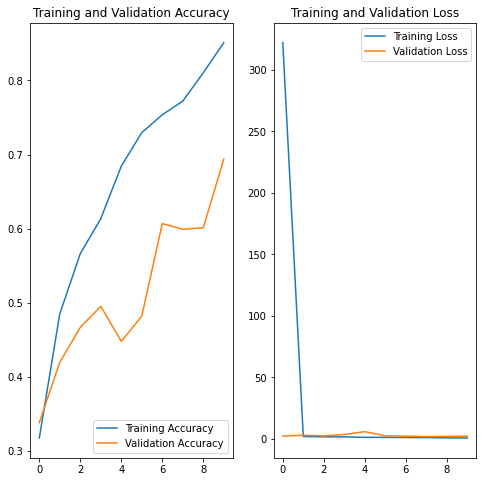

In [ ]:
vgg.compile(optimizer='sgd',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_vgg = vgg.fit(
  train_12,
  validation_data=val_12,
  epochs=epochs
)
show_perfs(history_vgg, epochs)

C'est le meilleur score d'accuracy que j'ai pu obtenir jusqu'à maintenant ! Comme la courbe était sur une pente d'amélioration, j'essaie avec plus d'epochs.

Epoch 1/50
67/67 [==============================] - 7s 95ms/step - loss: 0.4333 - accuracy: 0.8886 - val_loss: 1.5538 - val_accuracy: 0.7410
Epoch 2/50
67/67 [==============================] - 7s 95ms/step - loss: 0.3358 - accuracy: 0.9033 - val_loss: 1.9405 - val_accuracy: 0.7108
Epoch 3/50
67/67 [==============================] - 7s 95ms/step - loss: 0.3167 - accuracy: 0.9056 - val_loss: 1.7471 - val_accuracy: 0.7505
Epoch 4/50
67/67 [==============================] - 7s 95ms/step - loss: 0.3081 - accuracy: 0.9160 - val_loss: 2.1203 - val_accuracy: 0.7316
Epoch 5/50
67/67 [==============================] - 7s 95ms/step - loss: 0.2639 - accuracy: 0.9254 - val_loss: 2.0847 - val_accuracy: 0.7164
Epoch 6/50
67/67 [==============================] - 7s 95ms/step - loss: 0.2800 - accuracy: 0.9155 - val_loss: 1.7809 - val_accuracy: 0.7259
Epoch 7/50
67/67 [==============================] - 7s 95ms/step - loss: 0.2419 - accuracy: 0.9297 - val_loss: 4.5194 - val_accuracy: 0.6767
Epoch 8/50
67

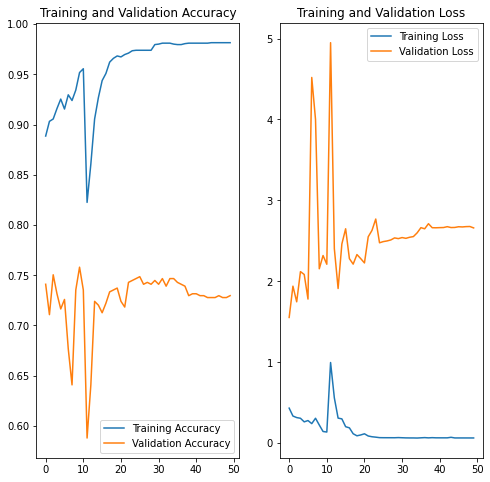

In [ ]:
history_vgg_50 = vgg.fit(
  train_12,
  validation_data=val_12,
  epochs=50
)
show_perfs(history_vgg_50, 50)

Je vais maintenant tester un autre modèle entrainé sur ImageNet fourni avec Keras : ResNet50.

Comme pour la meilleure version obtenue précédemment, je conserve les poids des couches existantes.

In [ ]:
resnet = ResNet50(include_top=False, input_shape=(height, width, 3))
for layer in resnet.layers:
        layer.trainable = False
flat1 = Flatten()(resnet.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(nb_classes, activation='softmax')(class1)
resnet = Model(inputs=resnet.inputs, outputs=output)
resnet.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

Epoch 1/10
67/67 [==============================] - 10s 106ms/step - loss: 5.6709 - accuracy: 0.5984 - val_loss: 1.5366 - val_accuracy: 0.6484
Epoch 2/10
67/67 [==============================] - 6s 91ms/step - loss: 0.2808 - accuracy: 0.9061 - val_loss: 0.5324 - val_accuracy: 0.8053
Epoch 3/10
67/67 [==============================] - 6s 90ms/step - loss: 0.0438 - accuracy: 0.9910 - val_loss: 0.5087 - val_accuracy: 0.8166
Epoch 4/10
67/67 [==============================] - 6s 90ms/step - loss: 0.0131 - accuracy: 0.9991 - val_loss: 1.3126 - val_accuracy: 0.7637
Epoch 5/10
67/67 [==============================] - 6s 90ms/step - loss: 0.0274 - accuracy: 0.9953 - val_loss: 0.5120 - val_accuracy: 0.8299
Epoch 6/10
67/67 [==============================] - 6s 90ms/step - loss: 0.0081 - accuracy: 0.9995 - val_loss: 0.5209 - val_accuracy: 0.8412
Epoch 7/10
67/67 [==============================] - 6s 90ms/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 0.5813 - val_accuracy: 0.8129
Epoch 8/10


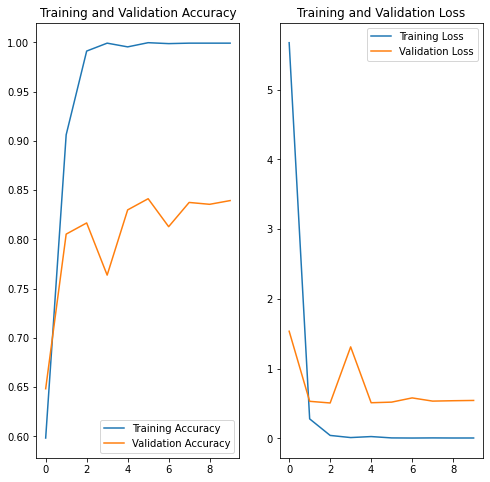

In [ ]:
resnet.compile(optimizer='sgd',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_resnet = resnet.fit(
  train_12,
  validation_data=val_12,
  epochs=epochs
)
show_perfs(history_resnet, epochs)

Le score est encore meilleur qu'avec VGG16 !
Je teste maintenant le modèle InceptionV3

87924736/87910968 [==============================] - 0s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                

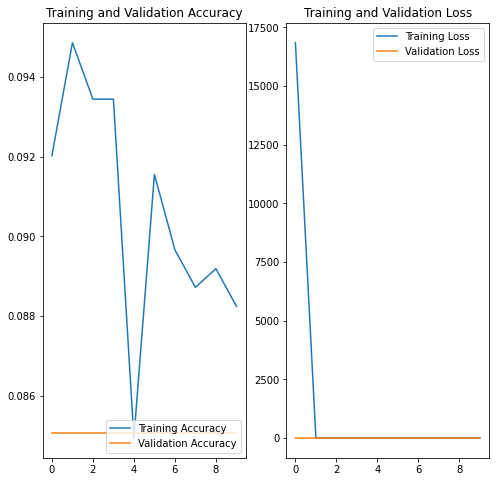

In [ ]:
inception = InceptionV3(include_top=False, input_shape=(height, width, 3))
for layer in inception.layers:
        layer.trainable = False
flat1 = Flatten()(inception.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(nb_classes, activation='softmax')(class1)
inception = Model(inputs=inception.inputs, outputs=output)
inception.summary()
inception.compile(optimizer='sgd',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_inception = inception.fit(
  train_12,
  validation_data=val_12,
  epochs=epochs
)
show_perfs(history_inception, epochs)

Etrangement, ce modèle ne semble pas du tout adapté à la tâche de classification d'images de chiens ?

83697664/83683744 [==============================] - 1s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                    

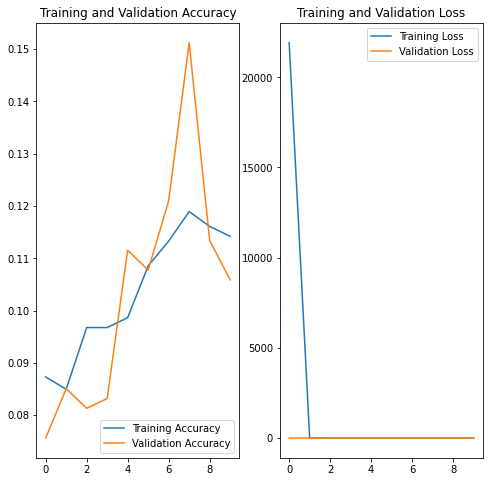

In [ ]:
xception = Xception(include_top=False, input_shape=(height, width, 3))
for layer in xception.layers:
        layer.trainable = False
flat1 = Flatten()(xception.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(nb_classes, activation='softmax')(class1)
xception = Model(inputs=xception.inputs, outputs=output)
xception.summary()
xception.compile(optimizer='sgd',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_xception = xception.fit(
  train_12,
  validation_data=val_12,
  epochs=epochs
)
show_perfs(history_xception, epochs)

Le modèle Xception fait un peu mieux qu'Inception, mais beaucoup moins bien que VGG16 ou Resnet50.

Je poursuis mes expériences avec le modèle EfficientNetB0 (il existe plusieurs versions du modèle EfficientNet adapté à différentes résolutions pour les images en entrée - la version B0 correspond à des images de 224x224).

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_9[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

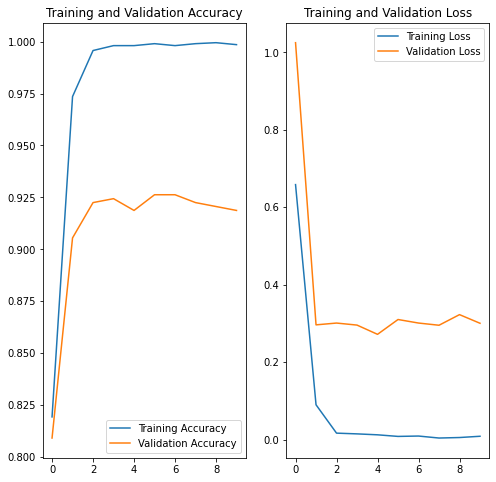

In [ ]:
efficientnet = EfficientNetB0(include_top=False, weights='imagenet',
                              input_shape=(height, width, 3),
                              classes=nb_classes)
for layer in efficientnet.layers:
        layer.trainable = False
flat1 = Flatten()(efficientnet.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(nb_classes, activation='softmax')(class1)
efficientnet = Model(inputs=efficientnet.inputs, outputs=output)
efficientnet.summary()
efficientnet.compile(optimizer='sgd',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_efficientnet = efficientnet.fit(
  train_12,
  validation_data=val_12,
  epochs=epochs
)
show_perfs(history_efficientnet, epochs)

Il s'agit du meilleur score obtenu jusqu'à maintenant ! J'essaie donc d'en optimiser les hyper-paramètres

In [ ]:
def model_builder(hp):

    # on cherche à optimiser la couche Dense
    hp_units = hp.Int('units', min_value=256, max_value=2048, step=128)

    # on cherche à optimiser la compilation du modèle
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-5,
                                max_value=1e-2, sampling='LOG', default=1e-3)

    efficientnet = EfficientNetB0(include_top=False, weights='imagenet',
                              input_shape=(height, width, 3),
                              classes=nb_classes)
    for layer in efficientnet.layers:
            layer.trainable = False
    flat1 = Flatten()(efficientnet.layers[-1].output)
    class1 = Dense(units=hp_units, activation='relu')(flat1)
    output = Dense(nb_classes, activation='softmax')(class1)
    efficientnet = Model(inputs=efficientnet.inputs, outputs=output)
    efficientnet.summary()
    efficientnet.compile(optimizer=SGD(learning_rate=hp_learning_rate),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    return efficientnet

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='keras_tuner',
                     project_name='dogs',
                     overwrite = True)

     |████████████████████████████████| 98 kB 5.3 MB/s 
16719872/16705208 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                        

In [ ]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [8]:
img_train = None
label_train = None
for image_batch, labels_batch in tqdm(train_12):
    if img_train == None:
        img_train = image_batch
        label_train = labels_batch
    else:
        img_train = tf.concat(axis=0, values = [img_train, image_batch])
        label_train = tf.concat(axis=0, values = [label_train, labels_batch])
  
print("img_train:", img_train.shape)
print("label_train:", label_train.shape)

100%|██████████| 67/67 [05:52<00:00,  5.26s/it]

img_train: (2119, 224, 224, 3)
label_train: (2119,)


In [ ]:
tuner.search(img_train, label_train, epochs=50, validation_split=0.2, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 00m 56s]
val_accuracy: 0.8915094137191772

Best val_accuracy So Far: 0.9245283007621765
Total elapsed time: 00h 13m 55s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hps.values

{'learning_rate': 0.006348644869799218,
 'tuner/bracket': 0,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/round': 0,
 'units': 1920}

J'utilise donc ces paramètres pour relancer un entrainement optimisé sur 50 epochs :

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

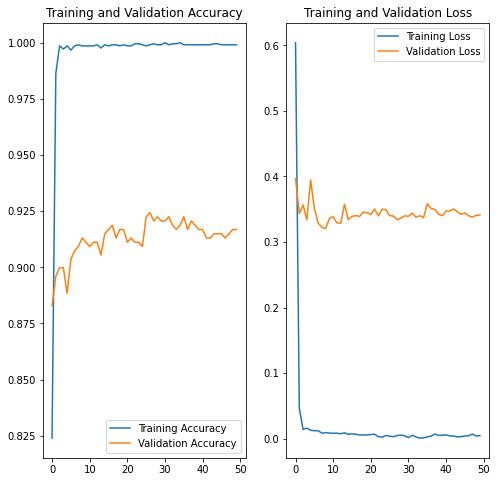

In [ ]:
efficientnet_opt = EfficientNetB0(include_top=False, weights='imagenet',
                              input_shape=(height, width, 3),
                              classes=nb_classes)
for layer in efficientnet_opt.layers:
        layer.trainable = False
flat1 = Flatten()(efficientnet_opt.layers[-1].output)
class1 = Dense(1920, activation='relu')(flat1)
output = Dense(nb_classes, activation='softmax')(class1)
efficientnet_opt = Model(inputs=efficientnet_opt.inputs, outputs=output)
efficientnet_opt.summary()
efficientnet_opt.compile(optimizer=SGD(learning_rate=0.006348644869799218),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_efficientnet_opt = efficientnet_opt.fit(
  train_12,
  validation_data=val_12,
  epochs=50
)
show_perfs(history_efficientnet_opt, 50)

On frôle les 92% d'accuracy sur ce modèle optimisé ! Je le sauvegarde

In [ ]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
efficientnet_opt.save('efficientnet_opt_12.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


J'essaie d'ajouter une augmentation de données

In [23]:
data_augmentation = Sequential([
  RandomFlip("horizontal", input_shape=(height, width, 3)),
  RandomRotation(factor=0.4, fill_mode="wrap"),
  RandomZoom(0.2),
  RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode="wrap"),
  RandomContrast(factor=0.2)
])

Epoch 1/50
67/67 [==============================] - 11s 89ms/step - loss: 2.2001 - accuracy: 0.3426 - val_loss: 1.8051 - val_accuracy: 0.6654
Epoch 2/50
67/67 [==============================] - 5s 72ms/step - loss: 1.7349 - accuracy: 0.5729 - val_loss: 1.3508 - val_accuracy: 0.8280
Epoch 3/50
67/67 [==============================] - 5s 71ms/step - loss: 1.4110 - accuracy: 0.6711 - val_loss: 1.0487 - val_accuracy: 0.8620
Epoch 4/50
67/67 [==============================] - 5s 71ms/step - loss: 1.2183 - accuracy: 0.7036 - val_loss: 0.8454 - val_accuracy: 0.8847
Epoch 5/50
67/67 [==============================] - 5s 72ms/step - loss: 1.0745 - accuracy: 0.7282 - val_loss: 0.7132 - val_accuracy: 0.8941
Epoch 6/50
67/67 [==============================] - 5s 72ms/step - loss: 0.9725 - accuracy: 0.7489 - val_loss: 0.6127 - val_accuracy: 0.9112
Epoch 7/50
67/67 [==============================] - 5s 71ms/step - loss: 0.9144 - accuracy: 0.7419 - val_loss: 0.5443 - val_accuracy: 0.9130
Epoch 8/50
6

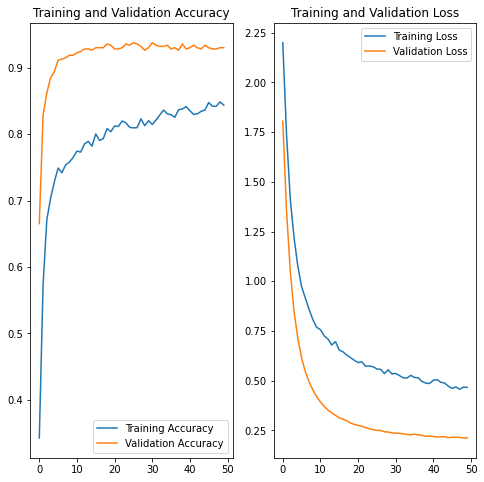

In [ ]:
base_model = EfficientNetB0(include_top=False, weights='imagenet',
                            input_shape=(height, width, 3),
                            classes=nb_classes)
base_model.trainable = False
inputs = Input(shape=(height, width, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
class1 = Dense(1920, activation='relu')(x)
outputs = Dense(nb_classes, activation='softmax')(class1)
model_opt_augmented = Model(inputs, outputs)
model_opt_augmented.compile(optimizer=SGD(learning_rate=0.006348644869799218),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_efficientnet_12 = model_opt_augmented.fit(
  train_12,
  validation_data=val_12,
  epochs=50
)
show_perfs(history_efficientnet_12, 50)

J'ai encore amélioré le résultat, on dépasse maintenant le 93% d'accuracy !

Je vais maintenant tester avec un jeu de données après passage en noir & blanc.
J'ai converti "manuellement" les images avec ImageMagick :
```
for D in `ls -d n*`; do cd $D; for F in `ls *.jpg`; do convert $F -colorspace Gray $F; done; cd ..; done
```


In [21]:
dataset_12_bw = "images_12_bw"
train_12_bw = image_dataset_from_directory(
  dataset_12_bw,
  validation_split=0.2,
  subset="training",
  seed=99,
  image_size=(height, width),
  batch_size=batch_size)
val_12_bw = image_dataset_from_directory(
  dataset_12_bw,
  validation_split=0.2,
  subset="validation",
  seed=99,
  image_size=(height, width),
  batch_size=batch_size)

Found 2648 files belonging to 12 classes.
Using 2119 files for training.
Found 2648 files belonging to 12 classes.
Using 529 files for validation.


Epoch 1/50
67/67 [==============================] - 516s 7s/step - loss: 2.3334 - accuracy: 0.2199 - val_loss: 2.0114 - val_accuracy: 0.5558
Epoch 2/50
67/67 [==============================] - 5s 76ms/step - loss: 2.0188 - accuracy: 0.4266 - val_loss: 1.6525 - val_accuracy: 0.6711
Epoch 3/50
67/67 [==============================] - 5s 75ms/step - loss: 1.7851 - accuracy: 0.5130 - val_loss: 1.3738 - val_accuracy: 0.7543
Epoch 4/50
67/67 [==============================] - 5s 76ms/step - loss: 1.6175 - accuracy: 0.5578 - val_loss: 1.1676 - val_accuracy: 0.7958
Epoch 5/50
67/67 [==============================] - 5s 76ms/step - loss: 1.5058 - accuracy: 0.5753 - val_loss: 1.0148 - val_accuracy: 0.8091
Epoch 6/50
67/67 [==============================] - 5s 75ms/step - loss: 1.3699 - accuracy: 0.6182 - val_loss: 0.8876 - val_accuracy: 0.8129
Epoch 7/50
67/67 [==============================] - 5s 74ms/step - loss: 1.2975 - accuracy: 0.6130 - val_loss: 0.7954 - val_accuracy: 0.8223
Epoch 8/50
67

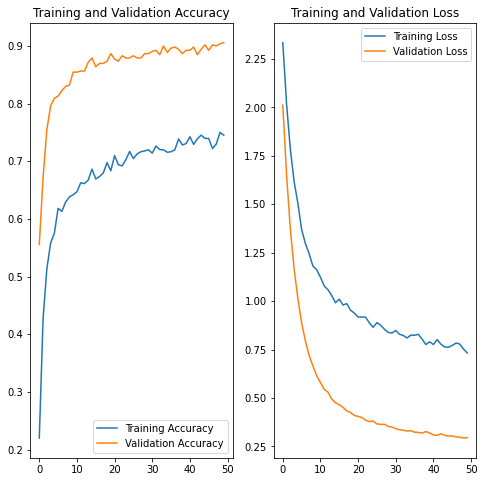

In [24]:
base_model = EfficientNetB0(include_top=False, weights='imagenet',
                            input_shape=(height, width, 3),
                            classes=nb_classes)
base_model.trainable = False
inputs = Input(shape=(height, width, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
class1 = Dense(1920, activation='relu')(x)
outputs = Dense(nb_classes, activation='softmax')(class1)
model_opt_augmented_bw = Model(inputs, outputs)
model_opt_augmented_bw.compile(optimizer=SGD(learning_rate=0.006348644869799218),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_efficientnet_12_bw = model_opt_augmented_bw.fit(
  train_12_bw,
  validation_data=val_12_bw,
  epochs=50
)
show_perfs(history_efficientnet_12_bw, 50)

Avec des images passées en noir & blanc, je ne constate donc pas d'amélioration au final.

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


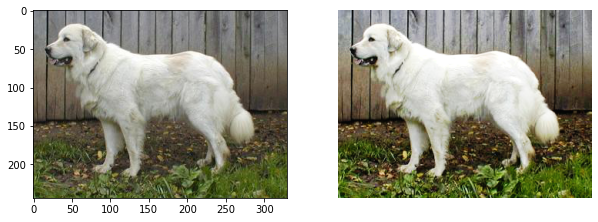

In [29]:
from skimage import exposure, img_as_float
def histogram_eq(img):
    img = img_as_float(img)
    # Contrast stretching
    p2 = np.percentile(img, 2)
    p98 = np.percentile(img, 98)
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    # Equalization
    img_eq = exposure.equalize_hist(img_rescale)
    return img_eq

dataset_dir = "./images/"
image = os.path.join(dataset_dir, 'n02111500-Great_Pyrenees', 
                     'n02111500_109.jpg')
img = Image.open(image) 
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 2, 1)
plt.imshow(img)
ax = plt.subplot(1, 2, 2)
plt.imshow(histogram_eq(img))
plt.axis("off")
plt.show()

Pour finir, je vais entrainer le modèle optimisé sur 10% des données sur le jeu de données entier.

In [ ]:
dataset_dir = "./images/"
train_ds = image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="training",
  seed=99,
  image_size=(height, width),
  batch_size=batch_size)
val_ds = image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",
  seed=99,
  image_size=(height, width),
  batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                            

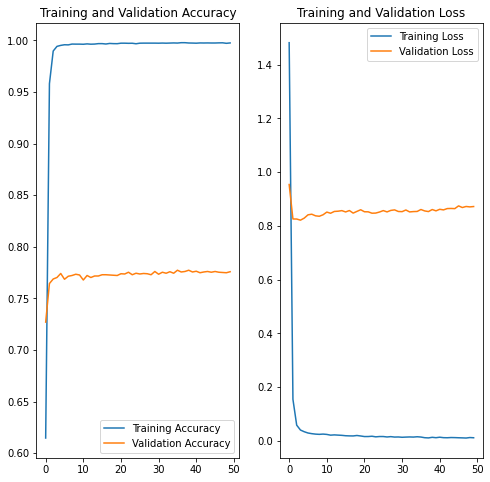

In [ ]:
efficientnet_120 = EfficientNetB0(include_top=False, weights='imagenet',
                              input_shape=(height, width, 3),
                              classes=120)
for layer in efficientnet_120.layers:
        layer.trainable = False
flat1 = Flatten()(efficientnet_120.layers[-1].output)
class1 = Dense(1920, activation='relu')(flat1)
output = Dense(120, activation='softmax')(class1)
efficientnet_120 = Model(inputs=efficientnet_120.inputs, outputs=output)
efficientnet_120.summary()
efficientnet_120.compile(optimizer=SGD(learning_rate=0.006348644869799218),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_efficientnet_120 = efficientnet_120.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)
show_perfs(history_efficientnet_120, 50)

In [ ]:
efficientnet_120.save('efficientnet_opt_120.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
